# Problem 1

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load and preprocess data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target  # Normalize
X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)  # 10% subset

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import numpy as np

# Convert X and y to numpy arrays for consistent indexing
X = np.array(X)
y = np.array(y)

def bootstrap_knn(X, y, k_values, bootstrap_iters):
    results = {}  # Dictionary to store accuracies for each k and iteration count

    for k in k_values:
        results[k] = []
        knn = KNeighborsClassifier(n_neighbors=k)

        # Loop through each number of bootstrap iterations
        for number_of_iters in bootstrap_iters:
            accuracies = []

            # Perform number_of_iters bootstrap iterations
            for _ in range(number_of_iters):
                # Resample with replacement, ensuring unique indices
                resample_indices = resample(range(len(X)), replace=True)
                oob_mask = np.ones(len(X), dtype=bool)
                oob_mask[resample_indices] = False  # Mark in-bag samples as False

                # Select in-bag and out-of-bag samples
                X_resampled = X[resample_indices]
                y_resampled = y[resample_indices]
                X_oob = X[oob_mask]
                y_oob = y[oob_mask]

                # Fit model on resampled data
                knn.fit(X_resampled, y_resampled)

                # Calculate OOB accuracy and store it
                if len(X_oob) > 0:
                    oob_accuracy = knn.score(X_oob, y_oob)
                    accuracies.append(oob_accuracy)

            # Store mean accuracy for this k and iteration count
            if accuracies:
                mean_accuracy = np.mean(accuracies)

            results[k].append(mean_accuracy)

    return results

k_values = range(1, 11)
bootstrap_iters = [1, 2, 11, 22, 44, 88]
accuracies = bootstrap_knn(X, y, k_values, bootstrap_iters)

[0.9311320044158413, 0.923670172115386, 0.9258379113909941, 0.9234348279889654, 0.9255895862772952, 0.9237641104725491, 0.9253700504064711, 0.9246388852854829, 0.9241270387411097, 0.9241064061366394]


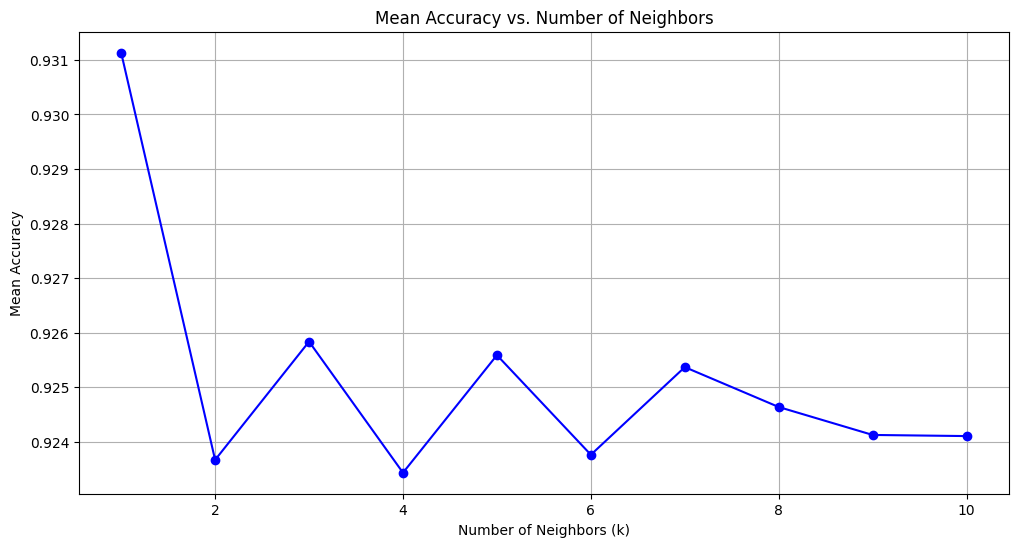

In [ ]:
import matplotlib.pyplot as plt

# Plot mean accuracy for each k
mean_accuracies_per_k = [np.mean(accuracies[k]) for k in k_values]
print(mean_accuracies_per_k)

plt.figure(figsize=(12, 6))
plt.plot(k_values, mean_accuracies_per_k, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

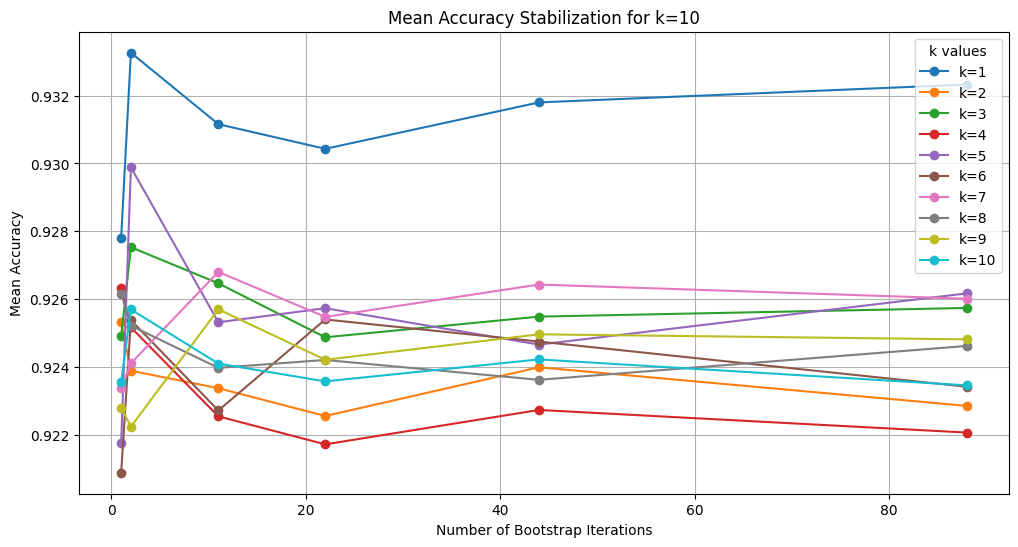

In [ ]:
# Plot mean accuracy stabilization
plt.figure(figsize=(12, 6))
legend_labels = []

for k_value_to_plot in accuracies:
    plt.plot(bootstrap_iters, accuracies[k_value_to_plot], marker='o', linestyle='-')
    legend_labels.append(f'k={k_value_to_plot}')

plt.title(f'Mean Accuracy Stabilization for k={k_value_to_plot}')
plt.xlabel('Number of Bootstrap Iterations')
plt.ylabel('Mean Accuracy')
plt.legend(legend_labels, title="k values", loc='upper right')
plt.grid(True)

plt.show()

# Problem 2

In [ ]:

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# # Load and preprocess data
# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist.data / 255.0, mnist.target  # Normalize
# X, _, y, _ = train_test_split(X, y, test_size=0.9, random_state=42)  # 10% subset
#
# # Convert X and y to numpy arrays for consistent indexing
# X = np.array(X)
# y = np.array(y)

loo = LeaveOneOut()

# Initialize a list to store accuracy values for different values of k
accuracies = []

# Loop through different values of k
k_values = range(1, 11)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    loo_accuracies = []

    # Perform LOO CV
    for train_index, test_index in loo.split(X):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]

        # Train and evaluate the KNN model
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        loo_accuracies.append(accuracy_score(y_test, y_pred))

    # Calculate the mean accuracy for this value of k
    mean_accuracy = np.mean(loo_accuracies)
    accuracies.append(mean_accuracy)

# Determine the optimal k
optimal_k = np.argmax(accuracies) + 1
print(f"Optimal k: {optimal_k}")

Optimal k: 3


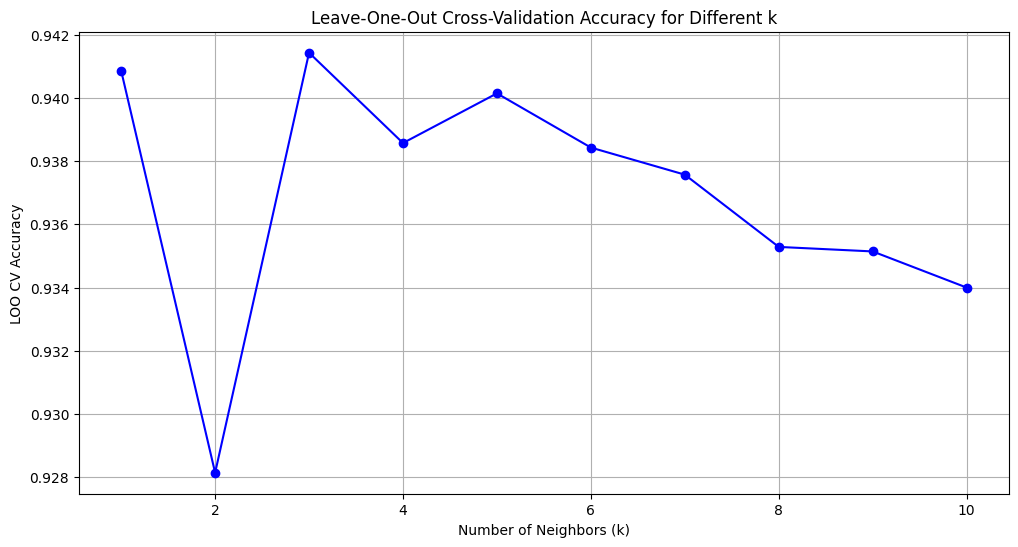

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Leave-One-Out Cross-Validation Accuracy for Different k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('LOO CV Accuracy')
plt.grid(True)
plt.show()

# Problem 3

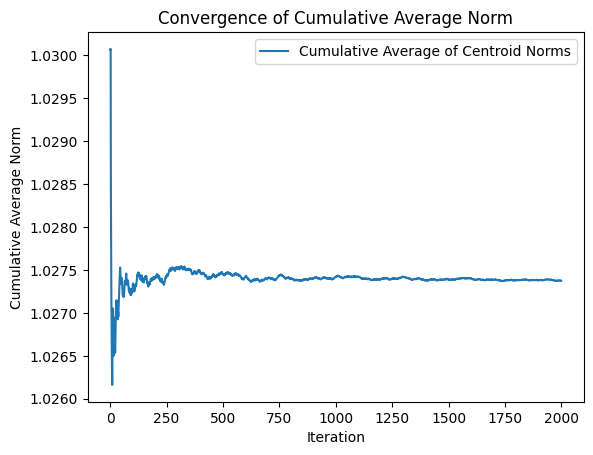

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate 10,000 samples from a 2D Gaussian distribution
n_samples = 10000
data = np.random.normal(0, 1, (n_samples, 2))

# Function to calculate the average centroid norm
def calculate_average_centroid_norm(data, n_clusters=3):
    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_

    # Calculate norms of the centroids
    norms = np.linalg.norm(centroids, axis=1)
    return np.mean(norms)

iterations = 2000
norm_averages = []

# Compute R_i for each iteration with randomized data generation for stability
for _ in range(iterations):
    average_norm = calculate_average_centroid_norm(data)
    norm_averages.append(average_norm)

# Calculate cumulative averages
cumulative_averages = np.cumsum(norm_averages) / np.arange(1, iterations + 1)

# Plotting
plt.plot(cumulative_averages, label='Cumulative Average of Centroid Norms')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Average Norm')
plt.title('Convergence of Cumulative Average Norm')
plt.legend()
plt.show()
